In [115]:
import pandas as pd
import numpy as np
import csv


In [116]:

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [117]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 15
 

In [118]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   "data",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 14632 files belonging to 4 classes.


In [119]:
class_names = dataset.class_names
class_names

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [120]:
len(dataset)

458

In [121]:
131*32

4192

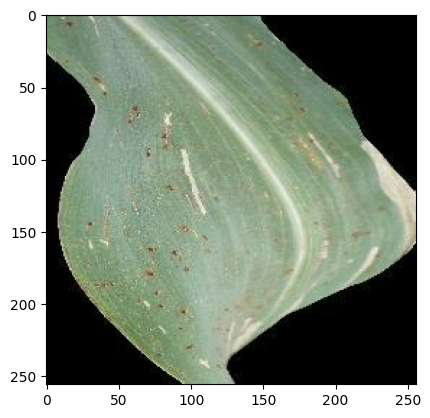

In [122]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

In [123]:
len(dataset)

458

In [124]:
train_size = 0.8
len(dataset)*train_size

366.40000000000003

In [125]:
train_ds = dataset.take(105)
len(train_ds)

105

In [126]:
test_ds = dataset.skip(105)
len(test_ds)

353

In [127]:
val_size = 0.1
len(dataset)*val_size

45.800000000000004

In [128]:
val_ds = dataset.take(13)
len(val_ds)

13

In [129]:
test_ds = test_ds.skip(13)
len(test_ds)

340

In [143]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split = 0.1, test_split=0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [131]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [132]:
len(train_ds)

366

In [133]:
len(val_ds)

45

In [134]:
len(test_ds)

47

In [144]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [136]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [137]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])


In [138]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models. Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation= 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers. Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation ='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape = input_shape)

In [139]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_9 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_10 (Sequential)      │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 4)                │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [145]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/5


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 4)

In [81]:
scores = model.evaluate(train_ds)

366/366 ━━━━━━━━━━━━━━━━━━━━ 107s 291ms/step - accuracy: 0.9609 - loss: 0.1165


In [82]:
model.save('CNNModel.keras')


In [83]:
scores

[0.12061025202274323, 0.9603011608123779]

In [84]:
history

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

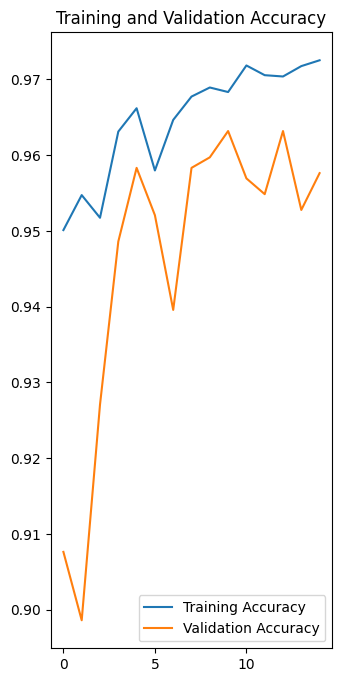

In [86]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

In [32]:
acc

[0.8247775435447693,
 0.9318959712982178,
 0.9435318112373352,
 0.9449007511138916,
 0.9497775435447693,
 0.9496064186096191,
 0.9531143307685852,
 0.9637234807014465,
 0.9622690081596375,
 0.9658623933792114,
 0.9609856009483337,
 0.962611198425293,
 0.9706536531448364,
 0.9719370007514954,
 0.972621500492096,
 0.9752737879753113,
 0.9757015705108643,
 0.9766427278518677,
 0.9724503755569458,
 0.9757015705108643,
 0.9734770655632019,
 0.9691991806030273,
 0.9772416353225708,
 0.9804072380065918,
 0.979295015335083,
 0.9802361130714417,
 0.975359320640564,
 0.9806639552116394,
 0.9798939228057861,
 0.979295015335083,
 0.9831451177597046,
 0.982460618019104,
 0.9798939228057861,
 0.9825462102890015,
 0.9847707152366638,
 0.9841718077659607,
 0.9836584329605103,
 0.9840862154960632,
 0.9834017753601074,
 0.9829739928245544,
 0.9841718077659607,
 0.9858829379081726,
 0.9853696227073669,
 0.987251877784729,
 0.9844284653663635,
 0.986824095249176,
 0.9875085353851318,
 0.9829739928245544,


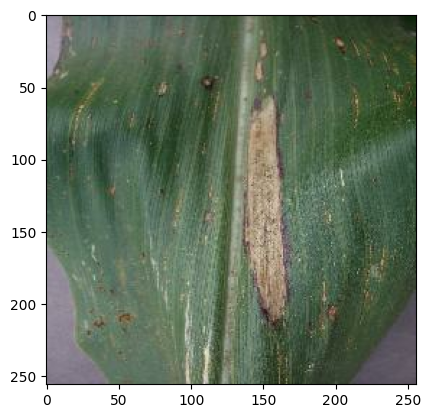

In [87]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

In [88]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the image from file
img_path = r'C:\Users\kashi\atmanirbhar_farmportal-master\src\ML code\data\Healthy\0a1a49a8-3a95-415a-b115-4d6d136b980b___R.S_HL 8216 copy_flipLR.jpg'
img = image.load_img(img_path, target_size=(256, 256))  # Assuming input size is (256, 256)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Convert single image to a batch

# Preprocess the image (resize and rescale)
img_array /= 255.0  # Rescale pixel values to [0, 1]

# Make prediction
predictions = model.predict(img_array)
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[0. 1. 0. 0.]]
